In [1]:
import numpy as np
import math
import random
from copy import deepcopy
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
class SimulatedAnnealingCV:
    
    def __init__(self, model, param_grid, scoring='accuracy', num_iterations=30, cv=5,early_stopping=False,k=None):
        self.model = model
        self.param_grid = param_grid
        self.X=None
        self.y=None
        self.scoring = scoring
        self.num_iterations = num_iterations
        self.cv = cv
        self.best_params=None
        self.best_score=float('-inf')
        self.k=k
        self.early_stopping=early_stopping
        
    def fit(self, X, y):
        self.X=X
        self.y=y
        
        params = self.generate_parameters()
        score = self.evaluate_params(params)
        
        no_improvement_count = 0
        if self.early_stopping and k == None:
            k=int(self.num_iterations*0.1)
            
        for i in range(1,self.num_iterations):  
            new_params = self.generate_parameters()
            new_score = self.evaluate_params(params)
            
            #print("new score",new_score,"best score",self.best_score)
            
            if new_score > score:
                score=new_score
                params=deepcopy(new_params)
                if new_score > self.best_score:
                    self.best_score=new_score
                    self.best_params = deepcopy(new_params)
                no_improvement_count = 0
            else:
                p = 1/i**0.5
                q=random.random()
                if q<p:
                    score=new_score
                    params=deepcopy(new_params)
                    no_improvement_count = 0
                else:
                    no_improvement_count+=1
                    
            if self.early_stopping and no_improvement_count >= k:
                break

    def generate_parameters(self):
        return {param : random.choice(value_list) for param,value_list in self.param_grid.items()}
        #TODO: different strategy for choosing neighbor of current params

    def evaluate_params(self,params):
        self.model.set_params(**params)
        scores = cross_val_score(self.model, self.X, self.y, cv=self.cv, scoring=self.scoring)
        return scores.mean()

In [3]:
param_grid_1={
    'max_depth' : [4,5,6],
    'criterion' : ['gini','entropy'],
    'min_samples_leaf':[2,3,4],
    'min_samples_split':[3,4,5]
}
#3*2*3*3 = 54
param_grid_2={
    'max_depth' : [4,5,6],
    'criterion' : ['gini','entropy'],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[3,4,5,6]
}
# 3*2*5*4 = 120
param_grid_3={
    'max_depth' : [4,5,6,7,8],
    'criterion' : ['gini','entropy'],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[3,4,5,6]
}
# 5*2*5*4 = 200
param_grid_4={
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' : ['gini','entropy'],
    'min_samples_leaf':[2,3,4,5,6,7],
    'min_samples_split':[3,4,5,6,7]
}
# 7*2*6*5 = 420

In [4]:
data=pd.read_csv('airline.csv')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

kolone_za_kodiranje = ["First Name", "Gender","Last Name", "Nationality", "Airport Name", "Airport Country Code", "Country Name", "Airport Continent", "Continents", "Arrival Airport", "Pilot Name", "Flight Status"]

for kolona in kolone_za_kodiranje:
    data[kolona] = label_encoder.fit_transform(data[kolona])
    
data["Departure Date"] = pd.to_datetime(data["Departure Date"])

data["Day"] = data["Departure Date"].dt.day
data["Month"] = data["Departure Date"].dt.month
data["Year"] = data["Departure Date"].dt.year

data = data[["Passenger ID", "First Name", "Last Name", "Gender", "Age", "Nationality",
             "Airport Name", "Airport Country Code", "Country Name", "Airport Continent",
             "Continents", "Day", "Month", "Year", "Arrival Airport",
             "Pilot Name", "Flight Status"]]

In [5]:
data_100=data.head(100)
data_1000=data.head(1000)
data_10000=data.head(10000)
data_100000=data
data_10000.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Day,Month,Year,Arrival Airport,Pilot Name,Flight Status
0,10856,2487,22626,0,62,105,1717,219,221,3,3,28,6,2022,1657,29123,2
1,43872,2629,6478,1,62,152,4228,34,37,3,3,26,12,2022,8499,30724,2
2,42633,2023,12947,1,67,177,3034,70,72,2,2,18,1,2022,2679,23677,2
3,78493,2298,31198,0,71,43,6031,34,37,3,3,16,9,2022,8673,26947,1
4,82072,828,29617,1,21,43,2870,219,221,3,3,25,2,2022,6724,9532,2


In [83]:
vreme_prostor_1 = []
vreme_prostor_2 = []
vreme_prostor_3 = []
vreme_prostor_4 = []

In [6]:
X_100 = data_100.iloc[:,:-1]
y_100 = data_100.iloc[:,-1]

In [7]:
from sklearn.tree import DecisionTreeClassifier
import time
model=DecisionTreeClassifier()

In [84]:
ga=SimulatedAnnealingCV(model,param_grid=param_grid_1,num_iterations=20)
start_time = time.time()
ga.fit(X_100,y_100)    
end_time = time.time()
execution_time = end_time - start_time
vreme_prostor_1.append(execution_time)
print(f"Izvršavanje koda trajalo je {execution_time} sekundi. Best score: {ga.best_score}")

Izvršavanje koda trajalo je 0.6859228610992432 sekundi. Best score: 0.4


In [14]:
ga=SimulatedAnnealingCV(model,param_grid=param_grid_2,num_iterations=40)
start_time = time.time()
ga.fit(X_100,y_100)    
end_time = time.time()
execution_time = end_time - start_time
vreme_prostor_2.append(execution_time)
print(f"Izvršavanje koda trajalo je {execution_time} sekundi. Best score: {ga.best_score}")

Izvršavanje koda trajalo je 0.8009028434753418 sekundi. Best score: 0.41


In [86]:
ga=SimulatedAnnealingCV(model,param_grid=param_grid_3,num_iterations=60)
start_time = time.time()
ga.fit(X_100,y_100)    
end_time = time.time()
execution_time = end_time - start_time
vreme_prostor_3.append(execution_time)
print(f"Izvršavanje koda trajalo je {execution_time} sekundi. Best score: {ga.best_score}")

Izvršavanje koda trajalo je 1.8112750053405762 sekundi. Best score: 0.43


In [87]:
ga=SimulatedAnnealingCV(model,param_grid=param_grid_4,num_iterations=140)
start_time = time.time()
ga.fit(X_100,y_100)    
end_time = time.time()
execution_time = end_time - start_time
vreme_prostor_4.append(execution_time)
print(f"Izvršavanje koda trajalo je {execution_time} sekundi. Best score: {ga.best_score}")

Izvršavanje koda trajalo je 3.981581926345825 sekundi. Best score: 0.43000000000000005


In [8]:
X_1000 = data_1000.iloc[:,:-1]
y_1000 = data_1000.iloc[:,-1]

In [92]:
ga=SimulatedAnnealingCV(model,param_grid=param_grid_1,num_iterations=20)
start_time = time.time()
ga.fit(X_1000,y_1000)    
end_time = time.time()
execution_time = end_time - start_time
vreme_prostor_1.append(execution_time)
print(f"Izvršavanje koda trajalo je {execution_time} sekundi. Best score: {ga.best_score}")

Izvršavanje koda trajalo je 1.3150677680969238 sekundi. Best score: 0.36299999999999993


In [93]:
ga=SimulatedAnnealingCV(model,param_grid=param_grid_2,num_iterations=40)
start_time = time.time()
ga.fit(X_1000,y_1000)    
end_time = time.time()
execution_time = end_time - start_time
vreme_prostor_2.append(execution_time)
print(f"Izvršavanje koda trajalo je {execution_time} sekundi. Best score: {ga.best_score}")

Izvršavanje koda trajalo je 2.7327213287353516 sekundi. Best score: 0.36299999999999993


In [94]:
ga=SimulatedAnnealingCV(model,param_grid=param_grid_3,num_iterations=60)
start_time = time.time()
ga.fit(X_1000,y_1000)    
end_time = time.time()
execution_time = end_time - start_time
vreme_prostor_3.append(execution_time)
print(f"Izvršavanje koda trajalo je {execution_time} sekundi. Best score: {ga.best_score}")

Izvršavanje koda trajalo je 3.6020567417144775 sekundi. Best score: 0.358


In [96]:
ga=SimulatedAnnealingCV(model,param_grid=param_grid_4,num_iterations=140)
start_time = time.time()
ga.fit(X_1000,y_1000)    
end_time = time.time()
execution_time = end_time - start_time
vreme_prostor_4.append(execution_time)
print(f"Izvršavanje koda trajalo je {execution_time} sekundi. Best score: {ga.best_score}")

Izvršavanje koda trajalo je 9.83879566192627 sekundi. Best score: 0.351


In [9]:
X_10000 = data_10000.iloc[:,:-1]
y_10000 = data_10000.iloc[:,-1]

[3.981581926345825, 9.83879566192627]

In [101]:
ga=SimulatedAnnealingCV(model,param_grid=param_grid_1,num_iterations=20)
start_time = time.time()
ga.fit(X_10000,y_10000)    
end_time = time.time()
execution_time = end_time - start_time
vreme_prostor_1.append(execution_time)
print(f"Izvršavanje koda trajalo je {execution_time} sekundi. Best score: {ga.best_score}")

Izvršavanje koda trajalo je 8.581634521484375 sekundi. Best score: 0.3387


In [102]:
ga=SimulatedAnnealingCV(model,param_grid=param_grid_2,num_iterations=40)
start_time = time.time()
ga.fit(X_10000,y_10000)    
end_time = time.time()
execution_time = end_time - start_time
vreme_prostor_2.append(execution_time)
print(f"Izvršavanje koda trajalo je {execution_time} sekundi. Best score: {ga.best_score}")

Izvršavanje koda trajalo je 12.994057893753052 sekundi. Best score: 0.3391


In [103]:
ga=SimulatedAnnealingCV(model,param_grid=param_grid_3,num_iterations=60)
start_time = time.time()
ga.fit(X_10000,y_10000)    
end_time = time.time()
execution_time = end_time - start_time
vreme_prostor_3.append(execution_time)
print(f"Izvršavanje koda trajalo je {execution_time} sekundi. Best score: {ga.best_score}")

Izvršavanje koda trajalo je 34.258793592453 sekundi. Best score: 0.3388


In [111]:
ga=SimulatedAnnealingCV(model,param_grid=param_grid_4,num_iterations=140)
start_time = time.time()
ga.fit(X_10000,y_10000)    
end_time = time.time()
execution_time = end_time - start_time
vreme_prostor_4.append(execution_time)
print(f"Izvršavanje koda trajalo je {execution_time} sekundi. Best score: {ga.best_score}")

Izvršavanje koda trajalo je 72.69564414024353 sekundi. Best score: 0.3424


In [113]:
vreme_prostor_1.append(58)
vreme_prostor_2.append(131)
vreme_prostor_3.append(233)
vreme_prostor_4.append(549)

In [10]:
X_100000 = data_100000.iloc[:,:-1]
y_100000 = data_100000.iloc[:,-1]

In [67]:
ga=SimulatedAnnealingCV(model,param_grid=param_grid_1,num_iterations=20)
start_time = time.time()
ga.fit(X_100000,y_100000)    
end_time = time.time()
execution_time = end_time - start_time
print(f"Izvršavanje koda trajalo je {execution_time} sekundi. Best score: {ga.best_score}")

Izvršavanje koda trajalo je 58.098814487457275 sekundi. Best score: 0.33549321559284595


In [68]:
ga=SimulatedAnnealingCV(model,param_grid=param_grid_2,num_iterations=40)
start_time = time.time()
ga.fit(X_100000,y_100000)    
end_time = time.time()
execution_time = end_time - start_time
print(f"Izvršavanje koda trajalo je {execution_time} sekundi. Best score: {ga.best_score}")

Izvršavanje koda trajalo je 131.44151735305786 sekundi. Best score: 0.33551349596905994


In [69]:
ga=SimulatedAnnealingCV(model,param_grid=param_grid_3,num_iterations=60)
start_time = time.time()
ga.fit(X_100000,y_100000)    
end_time = time.time()
execution_time = end_time - start_time
print(f"Izvršavanje koda trajalo je {execution_time} sekundi. Best score: {ga.best_score}")

Izvršavanje koda trajalo je 232.7356472015381 sekundi. Best score: 0.335614856206647


In [70]:
ga=SimulatedAnnealingCV(model,param_grid=param_grid_4,num_iterations=140)
start_time = time.time()
ga.fit(X_100000,y_100000)    
end_time = time.time()
execution_time = end_time - start_time
print(f"Izvršavanje koda trajalo je {execution_time} sekundi. Best score: {ga.best_score}")

Izvršavanje koda trajalo je 549.3689455986023 sekundi. Best score: 0.33697365118121014


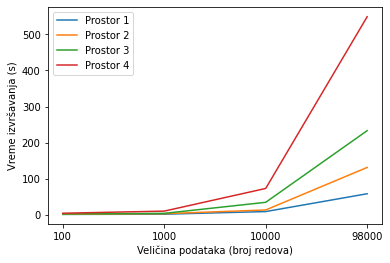

In [124]:
import matplotlib.pyplot as plt

# Veličina podataka (broj redova)
velicina_podataka = ['100','1000','10000','98000']

# Iscrtavanje kriva za svaki prostor pretrage
plt.plot(velicina_podataka, vreme_prostor_1, label='Prostor 1')
plt.plot(velicina_podataka, vreme_prostor_2, label='Prostor 2')
plt.plot(velicina_podataka, vreme_prostor_3, label='Prostor 3')
plt.plot(velicina_podataka, vreme_prostor_4, label='Prostor 4')

# Postavljanje naslova i oznaka osa
plt.xlabel('Veličina podataka (broj redova)')
plt.ylabel('Vreme izvršavanja (s)')

# Dodavanje legende
plt.legend()
plt.savefig('SimulatedAnnealingPerforances.png')
# Prikazivanje grafika
plt.show()

In [120]:
vreme_prostor_1

[0.6859228610992432, 1.3150677680969238, 8.581634521484375, 58]

In [121]:
vreme_prostor_2

[1.139803171157837, 2.7327213287353516, 12.994057893753052, 131]

In [122]:
vreme_prostor_3

[1.8112750053405762, 3.6020567417144775, 34.258793592453, 233]

In [123]:
vreme_prostor_4

[3.981581926345825, 9.83879566192627, 72.69564414024353, 549]

In [127]:
param_grid=[param_grid_1,param_grid_2,param_grid_3,param_grid_4]
from sklearn.model_selection import GridSearchCV

for i,params in enumerate(param_grid):
    grid=GridSearchCV(model,param_grid=params,n_jobs=1,scoring='accuracy')
    start_time = time.time()
    grid.fit(X_100,y_100)
    end_time = time.time() 
    execution_time = end_time - start_time
    print(f"Izvršavanje koda za param_grid_{i+1} trajalo je {execution_time} sekundi. Best score: {grid.best_score_}")

Izvršavanje koda za param_grid_1 trajalo je 2.02803373336792 sekundi. Best score: 0.44000000000000006
Izvršavanje koda za param_grid_2 trajalo je 4.513188123703003 sekundi. Best score: 0.45999999999999996
Izvršavanje koda za param_grid_3 trajalo je 8.244003772735596 sekundi. Best score: 0.43000000000000005
Izvršavanje koda za param_grid_4 trajalo je 13.604434728622437 sekundi. Best score: 0.45


In [129]:
param_grid=[param_grid_1,param_grid_2,param_grid_3,param_grid_4]
from sklearn.model_selection import GridSearchCV

for i,params in enumerate(param_grid):
    grid=GridSearchCV(model,param_grid=params,n_jobs=-1,scoring='accuracy')
    start_time = time.time()
    grid.fit(X_100,y_100)
    end_time = time.time() 
    execution_time = end_time - start_time
    print(f"Izvršavanje koda za param_grid_{i+1} trajalo je {execution_time} sekundi. Best score: {grid.best_score_}")

Izvršavanje koda za param_grid_1 trajalo je 0.5505616664886475 sekundi. Best score: 0.42000000000000004
Izvršavanje koda za param_grid_2 trajalo je 1.1437056064605713 sekundi. Best score: 0.43000000000000005
Izvršavanje koda za param_grid_3 trajalo je 1.848667860031128 sekundi. Best score: 0.4600000000000001
Izvršavanje koda za param_grid_4 trajalo je 4.624375581741333 sekundi. Best score: 0.44000000000000006


In [130]:
param_grid=[param_grid_1,param_grid_2,param_grid_3,param_grid_4]
from sklearn.model_selection import GridSearchCV

for i,params in enumerate(param_grid):
    grid=GridSearchCV(model,param_grid=params,n_jobs=1,scoring='accuracy')
    start_time = time.time()
    grid.fit(X_1000,y_1000)
    end_time = time.time() 
    execution_time = end_time - start_time
    print(f"Izvršavanje koda za param_grid_{i+1} trajalo je {execution_time} sekundi. Best score: {grid.best_score_}")

Izvršavanje koda za param_grid_1 trajalo je 3.8915672302246094 sekundi. Best score: 0.364
Izvršavanje koda za param_grid_2 trajalo je 7.923137664794922 sekundi. Best score: 0.363
Izvršavanje koda za param_grid_3 trajalo je 16.818293571472168 sekundi. Best score: 0.36299999999999993
Izvršavanje koda za param_grid_4 trajalo je 35.33608961105347 sekundi. Best score: 0.364


In [132]:
param_grid=[param_grid_1,param_grid_2,param_grid_3,param_grid_4]
from sklearn.model_selection import GridSearchCV

for i,params in enumerate(param_grid):
    grid=GridSearchCV(model,param_grid=params,n_jobs=-1,scoring='accuracy')
    start_time = time.time()
    grid.fit(X_1000,y_1000)
    end_time = time.time() 
    execution_time = end_time - start_time
    print(f"Izvršavanje koda za param_grid_{i+1} trajalo je {execution_time} sekundi. Best score: {grid.best_score_}")

Izvršavanje koda za param_grid_1 trajalo je 1.1434195041656494 sekundi. Best score: 0.363
Izvršavanje koda za param_grid_2 trajalo je 2.539797782897949 sekundi. Best score: 0.363
Izvršavanje koda za param_grid_3 trajalo je 4.574842214584351 sekundi. Best score: 0.365
Izvršavanje koda za param_grid_4 trajalo je 9.381115436553955 sekundi. Best score: 0.364


In [12]:
param_grid=[param_grid_1,param_grid_2,param_grid_3,param_grid_4]
from sklearn.model_selection import GridSearchCV

for i,params in enumerate(param_grid):
    grid=GridSearchCV(model,param_grid=params,n_jobs=1,scoring='accuracy')
    start_time = time.time()
    grid.fit(X_10000,y_10000)
    end_time = time.time() 
    execution_time = end_time - start_time
    print(f"Izvršavanje koda za param_grid_{i+1} trajalo je {execution_time} sekundi. Best score: {grid.best_score_}")

Izvršavanje koda za param_grid_1 trajalo je 14.773550748825073 sekundi. Best score: 0.33880000000000005
Izvršavanje koda za param_grid_2 trajalo je 32.85912036895752 sekundi. Best score: 0.3392
Izvršavanje koda za param_grid_3 trajalo je 62.73736882209778 sekundi. Best score: 0.3418
Izvršavanje koda za param_grid_4 trajalo je 166.14768362045288 sekundi. Best score: 0.3427


In [11]:
param_grid=[param_grid_1,param_grid_2,param_grid_3,param_grid_4]
from sklearn.model_selection import GridSearchCV

for i,params in enumerate(param_grid):
    grid=GridSearchCV(model,param_grid=params,n_jobs=-1,scoring='accuracy')
    start_time = time.time()
    grid.fit(X_10000,y_10000)
    end_time = time.time() 
    execution_time = end_time - start_time
    print(f"Izvršavanje koda za param_grid_{i+1} trajalo je {execution_time} sekundi. Best score: {grid.best_score_}")

Izvršavanje koda za param_grid_1 trajalo je 9.620265483856201 sekundi. Best score: 0.3387
Izvršavanje koda za param_grid_2 trajalo je 17.07034683227539 sekundi. Best score: 0.3392
Izvršavanje koda za param_grid_3 trajalo je 29.397377014160156 sekundi. Best score: 0.34190000000000004
Izvršavanje koda za param_grid_4 trajalo je 74.41358613967896 sekundi. Best score: 0.3427


In [14]:
param_grid=[param_grid_1,param_grid_2,param_grid_3,param_grid_4]
from sklearn.model_selection import GridSearchCV
for i,params in enumerate(param_grid):
    grid=GridSearchCV(model,param_grid=params,n_jobs=-1,scoring='accuracy')
    start_time = time.time()
    grid.fit(X_100000,y_100000)
    end_time = time.time() 
    execution_time = end_time - start_time
    print(f"Izvršavanje koda za param_grid_{i+1} trajalo je {execution_time} sekundi. Best score: {grid.best_score_}")

Izvršavanje koda za param_grid_1 trajalo je 101.8258125782013 sekundi. Best score: 0.33550335552389443
Izvršavanje koda za param_grid_2 trajalo je 221.7616903781891 sekundi. Best score: 0.33551349596905994
Izvršavanje koda za param_grid_3 trajalo je 505.57762384414673 sekundi. Best score: 0.3357365374356969
Izvršavanje koda za param_grid_4 trajalo je 1099.5495190620422 sekundi. Best score: 0.3370040709743556


In [ ]:
param_grid=[param_grid_1,param_grid_2,param_grid_3,param_grid_4]
from sklearn.model_selection import GridSearchCV
for i,params in enumerate(param_grid):
    grid=GridSearchCV(model,param_grid=params,n_jobs=1,scoring='accuracy')
    start_time = time.time()
    grid.fit(X_100000,y_100000)
    end_time = time.time() 
    execution_time = end_time - start_time
    print(f"Izvršavanje koda za param_grid_{i+1} trajalo je {execution_time} sekundi. Best score: {grid.best_score_}")

Izvršavanje koda za param_grid_1 trajalo je 372.60884284973145 sekundi. Best score: 0.33550335552389443
Izvršavanje koda za param_grid_2 trajalo je 773.6979596614838 sekundi. Best score: 0.33551349596905994
Izvršavanje koda za param_grid_3 trajalo je 9406.722153663635 sekundi. Best score: 0.3357263980187655
